# EDA Notebook for movielens dataset

### Downloading data

In [1]:
%load_ext autoreload
%autoreload 2

In [8]:
from movielens.dataset import get_dataset

In [5]:
DATA_DIR = "../data/movielens/"

In [10]:
get_dataset(save_dir=DATA_DIR)

2025-01-13 17:36:02 [INFO] movielens.dataset: Downloading ml-32m.zip from https://files.grouplens.org/datasets/movielens/ml-32m.zip...
ml-32m.zip: 100%|██████████| 233k/233k [01:52<00:00, 2.08kKB/s] 
2025-01-13 17:37:55 [INFO] movielens.dataset: Download complete. File saved to ..\data\movielens\ml-32m.zip
2025-01-13 17:38:01 [INFO] movielens.dataset: Extraction complete. Files have been unzipped to: ..\data\movielens


In [13]:
from pathlib import Path

import pandas as pd

In [18]:
DATA_PARENT = Path(DATA_DIR) / "ml-32m"
LINKS = DATA_PARENT / "links.csv"
MOVIES = DATA_PARENT / "movies.csv"
RATINGS = DATA_PARENT / "ratings.csv"
TAGS = DATA_PARENT / "tags.csv"

### Datset dfs

In [20]:
df_links = pd.read_csv(LINKS)
df_movies = pd.read_csv(MOVIES)
df_ratings = pd.read_csv(RATINGS)
df_tags = pd.read_csv(TAGS)

### Initial Explo

In [21]:
df_links.head()

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


In [22]:
df_movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [23]:
df_ratings.head()

,userId,movieId,rating,timestamp
0,1,17,4.0,944249077
1,1,25,1.0,944250228
2,1,29,2.0,943230976
3,1,30,5.0,944249077
4,1,32,5.0,943228858


In [24]:
df_tags.head()

,userId,movieId,tag,timestamp
0,22,26479,Kevin Kline,1583038886
1,22,79592,misogyny,1581476297
2,22,247150,acrophobia,1622483469
3,34,2174,music,1249808064
4,34,2174,weird,1249808102


In [46]:
from movielens.analysis import print_column_checks

In [55]:
print_column_checks(df_links)

Column: movieId
  dups: 0
  distin: 0
  uniq: 87585
  miss: 0
  count: {}
----------------------------------------
Column: imdbId
  dups: 0
  distin: 0
  uniq: 87585
  miss: 0
  count: {}
----------------------------------------
Column: tmdbId
  dups: 160
  distin: 36
  uniq: 87425
  miss: 124
  count: {21753.0: 2, 132641.0: 2, 34696.0: 2, 24487.0: 2, 15028.0: 2, 97995.0: 2, 10991.0: 2, 79782.0: 2, 46667.0: 2, 413765.0: 2, 9775.0: 2, 12600.0: 2, 19666.0: 2, 84198.0: 2, 30508.0: 2, 298721.0: 2, 13020.0: 2, 4912.0: 2, 372631.0: 2, 45555.0: 2}
----------------------------------------


In [54]:
print_column_checks(df_movies)

Column: movieId
  dups: 0
  distin: 0
  uniq: 87585
  miss: 0
  count: {}
----------------------------------------
Column: title
  dups: 203
  distin: 198
  uniq: 87382
  miss: 0
  count: {'Alone (2020)': 4, 'The Plague (2006)': 3, 'Journey to the Center of the Earth (2008)': 3, 'The Box (2021)': 3, 'An Inspector Calls (2015)': 2, 'The Midnight Man (2016)': 2, 'The Box (2003)': 2, 'The Tunnel (2016)': 2, 'Hide (2011)': 2, 'ATM (2012)': 2, 'The Dream Team (2012)': 2, 'Ecstasy (2011)': 2, 'Eros (2004)': 2, 'Taxi (2015)': 2, 'Weekend (2011)': 2, 'Left for Dead (2007)': 2, 'Savage (2011)': 2, 'The Promise (2016)': 2, 'Beneath (2013)': 2, 'Absolution (2015)': 2}
----------------------------------------
Column: genres
  dups: 85787
  distin: 1050
  uniq: 1798
  miss: 0
  count: {'Drama': 12443, 'Documentary': 8132, 'Comedy': 7761, '(no genres listed)': 7080, 'Comedy|Drama': 3245, 'Drama|Romance': 2825, 'Horror': 2487, 'Comedy|Romance': 2229, 'Thriller': 1410, 'Comedy|Drama|Romance': 1335, 'D

In [53]:
print_column_checks(df_ratings)

Column: userId
  dups: 31799256
  distin: 200948
  uniq: 200948
  miss: 0
  count: {175325: 33332, 17035: 9577, 55653: 9178, 123465: 9044, 171795: 9016, 10202: 7748, 198515: 7594, 49305: 7488, 22744: 7372, 7858: 7322, 14674: 6407, 53192: 6265, 133878: 6074, 57304: 6061, 129705: 5812, 139018: 5806, 43703: 5784, 68797: 5693, 103925: 5655, 119247: 5654}
----------------------------------------
Column: movieId
  dups: 31915772
  distin: 65825
  uniq: 84432
  miss: 0
  count: {318: 102929, 356: 100296, 296: 98409, 2571: 93808, 593: 90330, 260: 85010, 2959: 77332, 480: 75233, 527: 73849, 4993: 73122, 1196: 72151, 110: 69482, 1: 68997, 589: 68383, 50: 67750, 1210: 67496, 5952: 67463, 7153: 67449, 1198: 67408, 858: 66440}
----------------------------------------
Column: rating
  dups: 32000194
  distin: 10
  uniq: 10
  miss: 0
  count: {4.0: 8367654, 3.0: 6054990, 5.0: 4596577, 3.5: 4290105, 4.5: 2974000, 2.0: 2028622, 2.5: 1685386, 1.0: 946675, 1.5: 531063, 0.5: 525132}
----------------------

In [51]:
print_column_checks(df_tags)

Column: userId
  dups: 1984224
  distin: 13270
  uniq: 15848
  miss: 0
  count: {78213: 723473, 119227: 20369, 68821: 20317, 147560: 18849, 159300: 16843, 34874: 13838, 17035: 12829, 34458: 12735, 102040: 12681, 123480: 11551, 98941: 10582, 144253: 10381, 105590: 10167, 6324: 9636, 159555: 8468, 151456: 7984, 29623: 7124, 104632: 7114, 135375: 6684, 117845: 6599}
----------------------------------------
Column: movieId
  dups: 1948749
  distin: 43641
  uniq: 51323
  miss: 0
  count: {296: 6697, 79132: 6568, 260: 6519, 2571: 5722, 2959: 5532, 109487: 5477, 318: 4892, 4226: 3808, 7361: 3683, 356: 3581, 593: 3469, 164179: 3420, 4878: 3260, 4973: 3230, 202439: 3052, 115713: 3044, 541: 3009, 48780: 2972, 2858: 2896, 74458: 2845}
----------------------------------------
Column: tag
  dups: 1859093
  distin: 67804
  uniq: 140979
  miss: 17
  count: {'sci-fi': 10996, 'atmospheric': 9589, 'action': 8473, 'comedy': 8139, 'funny': 7467, 'surreal': 7231, 'visually appealing': 7090, 'based on a boo

### Summary of Data

Split into 4 parts (links, movies, ratings, tags)

Main keys are userId, movieId which connect the four tables

* links: 
  * movieId 
  * imdbId 
  * tmdbId 
  * 87k rows
  * Ids not well distributed, there is some risk if using as a feature
  * Some duplicate Ids in tmdbId, random and only ever 1 other dup. Total 160
* movies: 
  * movieId 
  * title 
  * genres (split by |) 
  * 87k rows
  * Some duplicate titles around 200, seems to be different to dup ids in tmdbId
  * 1800 distinct genres, 1000 used more than once. 
* ratings: 
  * userId 
  * movieId 
  * rating 
  * timestamp 
  * 32m rows
  * Ratings very unevenly distributed, as expected
  * Some variation in time stamp quite variable
  * userId well distributed
  * big variety in reviews per user, max is 30K!
  * about 20k movies with 1 review?
  * Quite a bit of duplication in timestamp too

* tags: 
  * userId 
  * movieId 
  * tag 
  * timestamp 
  * 2m rows
  * weir spike in userId, seems like 1 user did all the tagging???
  * smaller movieId have much more tags
  * Most of tagging done at 3 distinct times
  * Some null tag in the data
  * 67k distinct tags. Likely big variey in usage


### Plots

array([[<Axes: title={'center': 'userId'}>,
        <Axes: title={'center': 'movieId'}>],
       [<Axes: title={'center': 'timestamp'}>, <Axes: >]], dtype=object)

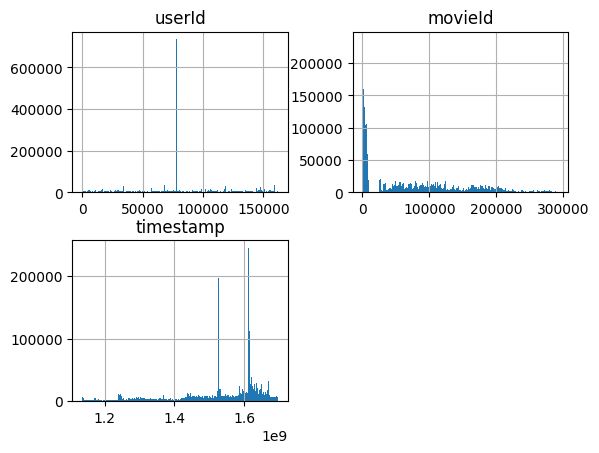

In [52]:
df_tags.hist(bins=200)

array([[<Axes: title={'center': 'userId'}>,
        <Axes: title={'center': 'movieId'}>],
       [<Axes: title={'center': 'rating'}>,
        <Axes: title={'center': 'timestamp'}>]], dtype=object)

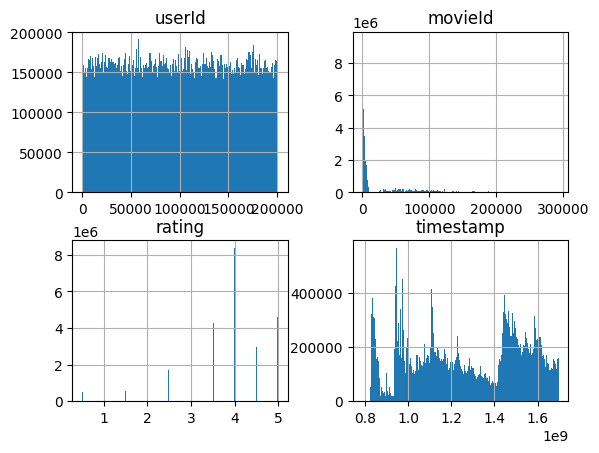

In [50]:
df_ratings.hist(bins=200)

array([[<Axes: title={'center': 'movieId'}>]], dtype=object)

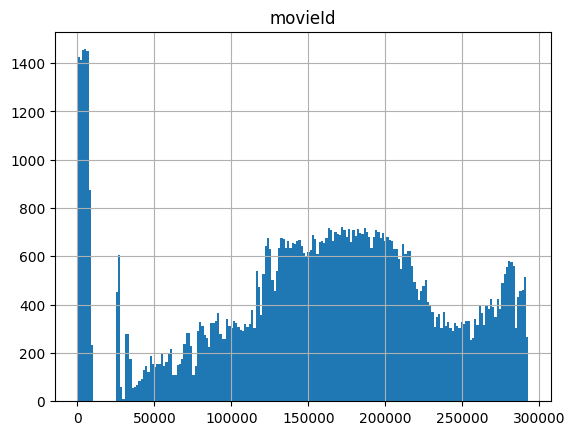

In [38]:
df_movies.hist(bins=200)

array([[<Axes: title={'center': 'movieId'}>,
        <Axes: title={'center': 'imdbId'}>],
       [<Axes: title={'center': 'tmdbId'}>, <Axes: >]], dtype=object)

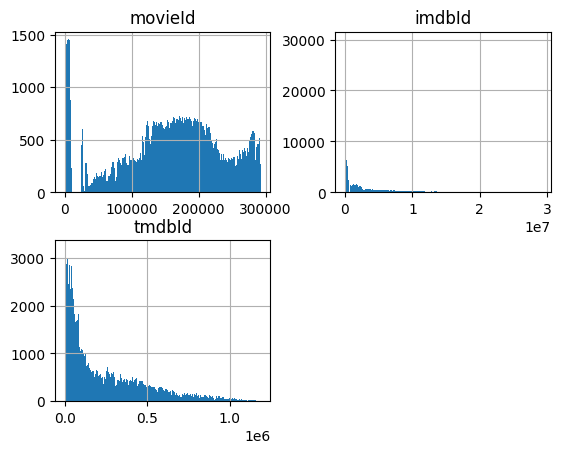

In [32]:
df_links.hist(bins=200)